In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sn
import random

In [41]:
df_train = pd.read_csv("data/DA_titanic_train.csv")
df_test = pd.read_csv("data/DA_titanic_test.csv")

## Adatok megismerése

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  624 non-null    int64  
 1   Survived     624 non-null    int64  
 2   Pclass       624 non-null    int64  
 3   Name         624 non-null    object 
 4   Sex          624 non-null    object 
 5   Age          494 non-null    float64
 6   SibSp        624 non-null    int64  
 7   Parch        624 non-null    int64  
 8   Ticket       624 non-null    object 
 9   Fare         624 non-null    float64
 10  Cabin        128 non-null    object 
 11  Embarked     623 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 58.6+ KB


In [43]:
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,624.000000,624.000000,624.000000,494.000000,624.000000,624.000000,624.000000
mean,459.128205,0.383013,2.328526,29.658745,0.519231,0.354167,30.523470
std,257.314092,0.486511,0.822684,14.770773,1.071871,0.775559,48.186064
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,241.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,460.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.931250
75%,683.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
5,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
7,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
8,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
9,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


A train adatokat első körben megvizsgálva látható, hogy 3 oszlop tartalmaz hiányos adatokat: az összesen 624 utas közül csak 494-nek ismerük a korát, 128-nak a cabin számát és 623-nak a felszállás helyét.

A PassengerId az utas egyedi azonosítója, egy integer. Mivel ez az adatbázisban elfoglalt helyét mutatja csak meg az utasnak, ezért várhatóan ezt nem fogom felhasználni.

A Survived alapján osztályozzuk az utasokat, értéke 0, amennyiben áldozat, 1 amennyiben túlélő. Összesen az utasok 38.3%-a élte túl a balesetet, tehát ez egy kiegyensúlyozatlan adathalmaz.

A Pclass fejezi ki, milyen osztályra szólt a jegye. Értéke 1,2,3 számok közül kerül ki, amely kifejezi, hogy melyik osztályon utazott.

A Name az utas neve. Elsőként a vezetéknév, vagy vezetéknevek szerepelnek, majd vessző után az utas titulusa, majd a keresztnevek, leánykori nevek, becenevek szerepelnek. A titulus információként szolgálhat az utas családi állapotáról, nemesi rangjáról, amely befolyásolhatta a túlélési esélyeit.

A Sex az utas neme, male abban az esetben ha férfi, female abban az esetben ha nő.

Az Age az utas kora években mérve, értéke 0.67 (8 hónap) és 80 között van.

A SibSp az utas fedélzeten lévő testvéreinek és házastársainak a száma.

A Parch az utas fedélzeten lévő szüleinek és gyerekeinek a száma.

A Ticket az utas jegyének a számát jelenti. Nem találtam egységes szabályt a jelentésére, a szám valószínűleg egy azonosító, az előtte lévő karakterek pedig amennyiben vannak, a jegy vételét azonosíthatják, néhány esetben város névvel. Több utasnak is lehet ugyanaz a jegye, amely szintén az utasok közötti kapcsolatnak egy jele, amely befolyásolhatja a túlélési esélyüket. Ez azonban egy olyan tulajdonság, amely hiányos adatok esetén hamis adatokat eredményez, így használhatósága kérdéses.

A Fare a jegyért fizetett összeg, lebegőpontos szám. Egy jegy több személyre is szólhat, ezért a személyenkénti árat megkaphatjuk, ha elosztjuk az árat azzal hány emberre szól a jegy. Mivel ez utóbbi információ függ attól, hogy az adatbázis mennyire teljes, a használhatósága ennek a számnak kérdéses.

A Cabin az utas kabinjának a száma. Az első karakter a fedélzetet, az utána következő szám pedig a kabin szinten belüli elhelyezkedését jelenti. Az utas kabinjának elhelyezkedése befolyásolatta a túlélés esélyét, azonban ez egy nagyon hiányos információ, így kétséges hogy mennyire lehet felhasználni. Néhány utas esetén több kabin is meg van adva, ezek egymáshoz közel helyezkednek, így ez esetben az első megadott kabint fogom választani. Több utas is lehet ugyanabban a kabinban, ami szintén befolyásolhatta a túlélési esélyeiket, azonban itt még inkább hiányosak az adatok, így ennek a használhatósága is kérdéses.

Az Embarked a hajóra felszállás helyét jelöli, C karakter Cherbourg, Q karakter Queenstown, S karakter Southampton




Az Embarked oszlopban egyetlen hiányzó adat van, itt egyszerűen a leggyakoribb felszállással fogom kiegészíteni az adatot.

Az Age várhatóan egy fontos információ, azonban nagyon sok a hiányzó adat. A kora eldöntésében segíthet a neve, egyrészt a titulusa, másrészt a vezetéknév segíthet a család azonosításában, ahol a többi családtagjának a SibSp, Parch oszlopainak, valamint a korának a segítségével kitalálhatjuk, milyen korosztályhoz tartozik az utas. Ez utóbbi a megoldás időigényes, ezért első lépésnek a titulusából, a neméből, valamint az osztályából teszek becslést a korára.



In [45]:
from collections import Counter
def transform_database(df: pd.DataFrame):
    df["Sex"] = (df["Sex"] == "female") * 1


    cabin_elements = Counter(df["Cabin"])
    cabin_elements.pop(np.nan)
    ticket_elements = Counter(df["Ticket"])

    df["NoCabin"] = df["Cabin"]
    df["NoTicket"] = df["Ticket"]
    df = df.replace({"NoCabin": cabin_elements, "NoTicket": ticket_elements})
    df["Relatives"] = df["SibSp"] + df["Parch"]
    df["Deck"] = df["Cabin"].str.slice(0,1)
    df["Room"] = df["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
    df["Title"] = df["Name"].str.split(",").str[1].str.split(".").str[0].str.strip()
    df["UnitFare"] = df["Fare"]/df["NoTicket"] 
    df["FareFamily"] = df["Fare"]/(df["Relatives"]+1)
    
    df["Deck"]= df["Deck"].fillna("N")
    
    
    df["Alone"] = (df["Relatives"] == 0)*1
    return df

In [46]:
df_train = transform_database(df_train)
df_test = transform_database(df_test)

In [47]:
df_test["Title"]

0         Mrs
1          Mr
2          Mr
3      Master
4         Mrs
        ...  
262       Mrs
263        Mr
264       Mrs
265       Rev
266        Mr
Name: Title, Length: 267, dtype: object

In [48]:
df_train.groupby([ "Sex", "Pclass","Title"]).mean()["Age"]

Sex  Pclass  Title       
0    1       Capt            70.000000
             Col             56.000000
             Don             40.000000
             Dr              50.000000
             Jonkheer        38.000000
             Major           48.500000
             Master           2.460000
             Mr              44.254717
     2       Dr              38.500000
             Master           2.416667
             Mr              31.853448
             Rev             46.400000
     3       Master           6.733333
             Mr              28.145570
1    1       Dr              49.000000
             Lady            48.000000
             Miss            31.760000
             Mlle            24.000000
             Mrs             40.555556
             the Countess    33.000000
     2       Miss            22.239130
             Mrs             33.733333
             Ms              28.000000
     3       Miss            15.500000
             Mrs             32.958333

In [49]:
df_train.groupby([ "Sex", "Pclass","Title",]).std()["Age"]

Sex  Pclass  Title       
0    1       Capt                  NaN
             Col                   NaN
             Don                   NaN
             Dr                    NaN
             Jonkheer              NaN
             Major            4.949747
             Master           2.177889
             Mr              14.614805
     2       Dr              21.920310
             Master           2.866919
             Mr              11.268653
             Rev             11.717508
     3       Master           3.326660
             Mr              10.501638
1    1       Dr                    NaN
             Lady                  NaN
             Miss            11.211155
             Mlle             0.000000
             Mrs             13.757049
             the Countess          NaN
     2       Miss            13.604703
             Mrs             10.824408
             Ms                    NaN
     3       Miss             9.935731
             Mrs             10.263821

In [50]:
df_train.groupby([ "Sex", "Pclass","Title",]).count()["Age"]

Sex  Pclass  Title       
0    1       Capt              1
             Col               1
             Don               1
             Dr                1
             Jonkheer          1
             Major             2
             Master            2
             Mr               53
     2       Dr                2
             Master            6
             Mr               58
             Rev               5
     3       Master           15
             Mr              158
1    1       Dr                1
             Lady              1
             Miss             25
             Mlle              2
             Mrs              27
             the Countess      1
     2       Miss             23
             Mrs              30
             Ms                1
     3       Miss             53
             Mrs              24
Name: Age, dtype: int64

In [51]:
print(Counter(df_train["Title"]))


print(Counter(df_test["Title"]))

Counter({'Mr': 357, 'Miss': 128, 'Mrs': 94, 'Master': 24, 'Rev': 5, 'Dr': 5, 'Major': 2, 'Mlle': 2, 'Don': 1, 'Ms': 1, 'Lady': 1, 'Col': 1, 'Capt': 1, 'the Countess': 1, 'Jonkheer': 1})
Counter({'Mr': 160, 'Miss': 54, 'Mrs': 31, 'Master': 16, 'Dr': 2, 'Mme': 1, 'Sir': 1, 'Col': 1, 'Rev': 1})


A különböző korú, titulusú és osztályú utasokat elemezve már jobban meg tudjuk becsülni az utasok korát.

Egy érdekes észrevétel, hogy várakozásaimmal ellentétben a Master előtag fiatal fiúgyerekek titulusa, elsősorban az alacsonyabb osztályúaké. Általánosságban a jobb osztályokon idősebbek, a kevésbé jó osztályokon fiatalabbak utaztak, ez különösen szembetűnő a Miss előtagóaknál, ahol az első osztályon 31.76 az átlagéletkor, a 3. osztályon pedig 15.5. Az Mrs előtagú nőknél is megfigyelhető ez, míg az 1. osztályon 40.56 az átlagéletkor a 3. osztályon 32.95, ahogy az Mr előtagú férfiaknál is az elsőosztályon 44.25, a harmadosztályon 28.14 volt az átlag életkor. Kevés az adat, de jellemzően, akiknek a fentieken kívül egyéb titulusuk van, némileg idősebbek a nemük és osztályukon belül. A train és teszt adatbázisban csak 1 Dr. előtagú utasnak nem tudjuk a korát, így őt a többi hasonló titulusú, nemű és osztályú utas átlagéletkorának becslem.



In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  624 non-null    int64  
 1   Survived     624 non-null    int64  
 2   Pclass       624 non-null    int64  
 3   Name         624 non-null    object 
 4   Sex          624 non-null    int32  
 5   Age          494 non-null    float64
 6   SibSp        624 non-null    int64  
 7   Parch        624 non-null    int64  
 8   Ticket       624 non-null    object 
 9   Fare         624 non-null    float64
 10  Cabin        128 non-null    object 
 11  Embarked     623 non-null    object 
 12  NoCabin      128 non-null    float64
 13  NoTicket     624 non-null    int64  
 14  Relatives    624 non-null    int64  
 15  Deck         624 non-null    object 
 16  Room         125 non-null    float64
 17  Title        624 non-null    object 
 18  UnitFare     624 non-null    float64
 19  FareFami

In [53]:
df_train.groupby(["Pclass", "Deck"]).mean()[["Fare", "UnitFare", "FareFamily"]]

Fare   UnitFare  FareFamily
Pclass Deck                                   
1      A      39.275342  39.275342   33.077658
       B     124.391669  83.576765   81.750402
       C     106.412373  54.601936   53.163193
       D      60.459380  44.975210   36.732330
       E      56.117326  41.951537   35.668569
       N      67.403772  47.398001   56.388580
2      D      13.222233  13.222233   13.222233
       E      11.587500  10.275000   11.587500
       F      28.625000  18.875000    9.666667
       N      20.230881  14.478192   12.833910
3      F       7.683333   7.683333    7.683333
       G      13.581250   6.790625    4.963021
       N      13.560856   8.878669    8.147609

In [54]:
df_train.groupby(["Pclass", "Deck"]).count()["Fare"]

Pclass  Deck
1       A        12
        B        26
        C        33
        D        20
        E        19
        N        32
2       D         3
        E         4
        F         4
        N       124
3       F         3
        G         4
        N       340
Name: Fare, dtype: int64

In [55]:
df_train.groupby(["Pclass", "Deck", "Embarked"]).count()[["Fare", "UnitFare", "FareFamily"]]

Fare  UnitFare  FareFamily
Pclass Deck Embarked                            
1      A    C            5         5           5
            S            7         7           7
       B    C           11        11          11
            S           14        14          14
       C    C           13        13          13
            Q            1         1           1
            S           19        19          19
       D    C            8         8           8
            S           12        12          12
       E    C            5         5           5
            S           14        14          14
       N    C           17        17          17
            S           15        15          15
2      D    C            2         2           2
            S            1         1           1
       E    Q            1         1           1
            S            3         3           3
       F    S            4         4           4
       N    C           12        12          12
            Q            2         2           2
            S          110       110         110
3      F    Q            1         1           1
            S            2         2           2
       G    S            4         4           4
       N    C           48        48          48
            Q           50        50          50
            S          242       242         242

In [56]:
df_train[(df_train["Pclass"]!=1) & (df_train["Deck"] != "N")][["Pclass", "Deck", "Fare", "UnitFare", "FareFamily"]].sort_values(["Pclass", "Deck"])

,Pclass,Deck,Fare,UnitFare,FareFamily
190,2,D,12.8750,12.87500,12.875000
214,2,D,13.0000,13.00000,13.000000
319,2,D,13.7917,13.79170,13.791700
80,2,E,13.0000,13.00000,13.000000
197,2,E,12.3500,12.35000,12.350000
494,2,E,10.5000,10.50000,10.500000
531,2,E,10.5000,5.25000,10.500000
95,2,F,26.0000,26.00000,8.666667
115,2,F,39.0000,19.50000,9.750000
349,2,F,10.5000,10.50000,10.500000


A jegyárat valószínűleg a kabin elhelyezkedése, a megvásárolt osztály, illetve a felszállás helye határozhatja meg. Egy jegy több személyre is szólhat, azonban mivel nem tudunk az összes utasról információt, ezért az ár, az ismert egységár, illetve a jegyár egy családtagra eső részét is célszerű vizsgálni.

A kabin betűjele fentről lefelé növekszik, az A a legmagasabb, a G a legalacsonyabb szint (amelyik szállított utasokat), ezzel arányos a kabinok minősége is. A jegyárak ezt azonban nem követik le teljesen, a B és C szint drágább, mint az A, amelynek az ára a D és E szintek árában van.

Kabin információ elsősorban az 1. osztály utasairól áll rendelkezésre. A hajó a Southhampton - Cherbourg - Queenstown, azonban az árak nem arányosak a megtett távolsággal, az első osztály utasai mind egységárban, mind jegyárban többet fizettek Cherbourg-ból indulva, mint Southhamptonból.

Queenstown-ból érkező utasok esetén nagyon keveseknek tudjuk a kabinját, valamint a 2. és 3. osztály utasai közül is nagyon kevésnek ismerjük a kabinját, így összességében a Deck értékét az osztály és az átlagos jegyár maximuma alapján határozom meg.

Harmadosztály esetén az F szintre 7.65-7.75 volt a jegyár, nekik nem volt rokonuk. A G szintre a 3. osztály esetén drágább volt a jegy, azonban az átlagos jegyár, illetve egy családtagra jutó jegyár is kevesebb (maximum 5.5). 3. osztályú utas esetén ezért a 6.5 alatti egy családtagra jutó jegyárak esetén a G szint, efelett pedig az F szintre osztom.

Másodosztály esetén FareFamily > 13 esetén a D szintre, FareFamily > 10 esetén az E szintre, alatta az F szintre osztom.

Elsőosztály esetén FareFamily > 60 esetén B, FareFamily > 45 esetén C, FareFamily > 35 esetén A, FareFamily > 30 esetén D, alatta E szintre osztom be az embereket.

A FareFamily-t azért választottam, mivel egy utas esetén ennek értéke nem függ az adatbázisban lévő többi utastól, mint a UnitFare, azonban figyelembe veszi, hogy a jegyár költsége nem egyedül az utast terheli.

In [57]:
df_train_orig = df_train.copy(deep=True)

In [78]:
def fill_na(df: pd.DataFrame):    

    age_map = df_train_orig.groupby([ "Sex", "Pclass","Title"]).mean()["Age"].to_dict()  # df_train is intentional
    
    min_room = min(df_train_orig[~df_train_orig["Room"].isnull()]["Room"])
    max_room = max(df_train_orig[~df_train_orig["Room"].isnull()]["Room"])

    for index, row in df[df["Age"].isnull()].iterrows():
        df.at[index, "Age"] = age_map[(row["Sex"], row["Pclass"],row["Title"],)]

        
    for index, row in df[df["Cabin"].isnull()].iterrows():
        if row["Pclass"] == 1:
            if row["FareFamily"] > 60:
                df.at[index, "Deck"] = "B"
            elif row["FareFamily"] > 45:
                df.at[index, "Deck"] = "C"
            elif row["FareFamily"] > 35:
                df.at[index, "Deck"] = "A"
            elif row["FareFamily"] > 30:
                df.at[index, "Deck"] = "D"
            else:
                df.at[index, "Deck"] = "E"
        if row["Pclass"] == 2:
            if row["FareFamily"] > 13:
                df.at[index, "Deck"] = "D"
            elif row["FareFamily"] > 10:
                df.at[index, "Deck"] = "E"
            else:
                df.at[index, "Deck"] = "F"
        if row["Pclass"] == 3:
            if row["FareFamily"] > 6.5:
                df.at[index, "Deck"] = "F"
            else:
                df.at[index, "Deck"] = "G"
        df.at[index, "Room"] = random.randint(min_room, max_room)
        
    return df

In [79]:
def break_categorical(df):
    
    one_hot = pd.get_dummies(df["Deck"], prefix="Deck")
    df = df.join(one_hot)

    Counter(df["Title"])
    from collections import defaultdict

    title_map = dict()
    title_map["Mr"] = "Mr"
    title_map["Mrs"] = "Mrs"
    title_map["Miss"] = "Miss"
    title_map["Master"] = "Master"
    title_map["Dr"] = "Dr"

    for key in Counter(df["Title"]).keys():
        if not key in title_map.keys():
            title_map[key] = "Other"

    df = df.replace({"Title": title_map})

    one_hot = pd.get_dummies(df["Title"], prefix="Title")
    df = df.join(one_hot)

    one_hot = pd.get_dummies(df["Pclass"], prefix="Pclass")
    df = df.join(one_hot)

    one_hot = pd.get_dummies(df["Embarked"], prefix="Embarked")
    df = df.join(one_hot)
    
    df = df.drop(columns=["Title","Name", "Ticket", "Cabin", "Embarked", "Deck", "PassengerId", "Pclass"])
    return df

In [80]:
df_train = fill_na(df_train)
df_test = fill_na(df_test)
                   


In [81]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,NoCabin,NoTicket,Relatives,Room,UnitFare,FareFamily,Alone
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,128.000000,624.000000,624.000000,621.000000,624.000000,624.000000,624.000000
mean,459.128205,0.383013,2.328526,0.365385,29.439153,0.519231,0.354167,30.523470,1.500000,1.500000,0.873397,62.798712,20.320522,19.267290,0.612179
std,257.314092,0.486511,0.822684,0.481924,13.731222,1.071871,0.775559,48.186064,0.851122,0.941294,1.572740,36.604333,26.871582,34.415324,0.487644
min,1.000000,0.000000,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,241.750000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000,1.000000,0.000000,31.000000,7.775000,7.250000,0.000000
50%,460.500000,0.000000,3.000000,0.000000,28.145570,0.000000,0.000000,13.931250,1.000000,1.000000,0.000000,63.000000,10.500000,8.050000,1.000000
75%,683.250000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,30.000000,2.000000,2.000000,1.000000,95.000000,23.287500,16.200000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,4.000000,5.000000,10.000000,128.000000,256.164600,512.329200,1.000000


Az új, származtatott tulajdonságok a következőek:

NoCabin,  hány emberrel utazott egy kabinban,

NoTicket, hány emberrel osztozott a jegyén,

Relatives, összesen hány rokona (gyerek, szülő, házastárs, testvér) utazott a hajón,

Deck, melyik szinten helyezkedett el a kabinja,

Room, a szinten belül melyik szobában helyezkedett el a kabinja,

Title, a titulusa,

UnitFare a jegye egységára.


Text(0, 0.5, 'Utasok száma')

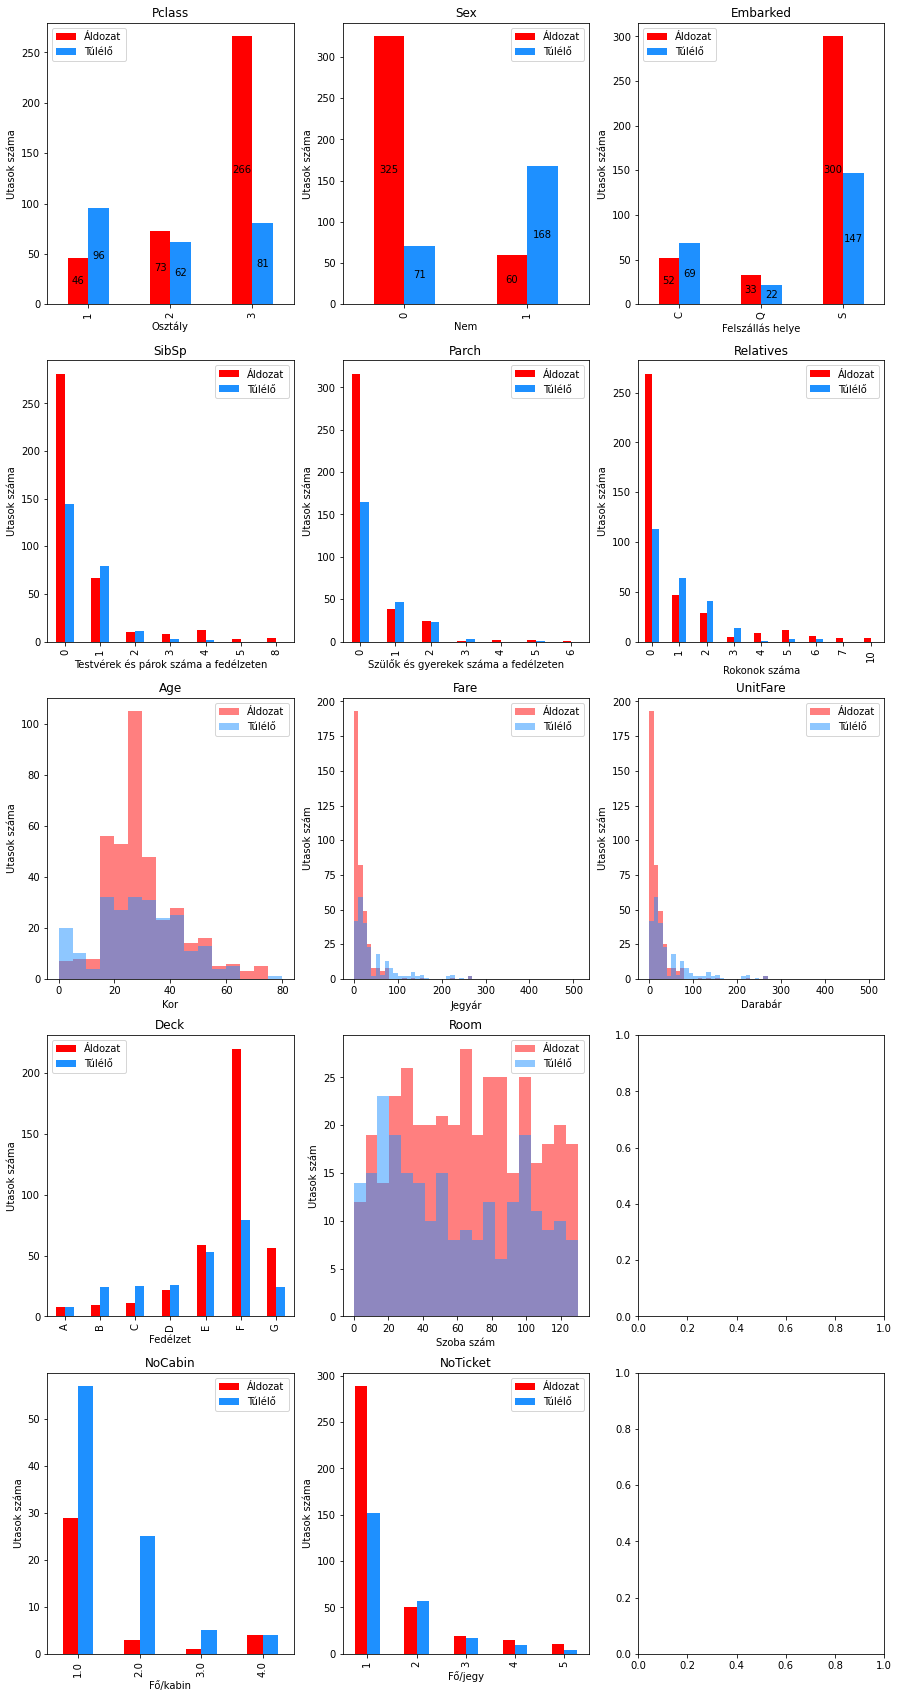

In [82]:
df_train_dead = df_train[df_train["Survived"] == 0]
df_train_survived = df_train[df_train["Survived"] == 1]


fig, axes = plt.subplots(nrows=5, ncols=3)
# fig.tight_layout(pad=1)
fig.set_size_inches(15,30)
df_pclass = pd.DataFrame({"Áldozat": df_train_dead.groupby("Pclass").count()["PassengerId"],
                          "Túlélő": df_train_survived.groupby("Pclass").count()["PassengerId"]})
ax = df_pclass.plot(kind='bar', color=['red', 'dodgerblue'], ax=axes[0,0])
ax.set_title("Pclass")
ax.set_xlabel("Osztály")
ax.set_ylabel("Utasok száma")
for i in ax.patches:
    ax.annotate(str(int(i.get_height())), xy=(i.get_x()+i.get_width()/2, i.get_height()/2), ha='center', va='center')

df_sex = pd.DataFrame({"Áldozat": df_train_dead.groupby("Sex").count()["PassengerId"],
                          "Túlélő": df_train_survived.groupby("Sex").count()["PassengerId"]})
ax = df_sex.plot(kind='bar', color=['red', 'dodgerblue'], ax=axes[0,1])
ax.set_title("Sex")
ax.set_xlabel("Nem")
ax.set_ylabel("Utasok száma")
for i in ax.patches:
    ax.annotate(str(int(i.get_height())), xy=(i.get_x()+i.get_width()/2, i.get_height()/2), ha='center', va='center')

df_sibsp = pd.DataFrame({"Áldozat": df_train_dead.groupby("SibSp").count()["PassengerId"],
                          "Túlélő": df_train_survived.groupby("SibSp").count()["PassengerId"]})
ax = df_sibsp.plot(kind='bar', color=['red', 'dodgerblue'], ax=axes[1,0])
ax.set_title("SibSp")
ax.set_xlabel("Testvérek és párok száma a fedélzeten")
ax.set_ylabel("Utasok száma")
# for i in ax.patches:
#     ax.annotate(str(int(i.get_height())), xy=(i.get_x()+i.get_width()/2, i.get_height()/2), ha='center', va='center')

df_parch = pd.DataFrame({"Áldozat": df_train_dead.groupby("Parch").count()["PassengerId"],
                          "Túlélő": df_train_survived.groupby("Parch").count()["PassengerId"]})
ax = df_parch.plot(kind='bar', color=['red', 'dodgerblue'], ax=axes[1,1])
ax.set_title("Parch")
ax.set_xlabel("Szülők és gyerekek száma a fedélzeten")
ax.set_ylabel("Utasok száma")
# for i in ax.patches:
#     ax.annotate(str(int(i.get_height())), xy=(i.get_x()+i.get_width()/2, i.get_height()/2), ha='center', va='center')
  
df_embarked = pd.DataFrame({"Áldozat": df_train_dead.groupby("Embarked").count()["PassengerId"],
                          "Túlélő": df_train_survived.groupby("Embarked").count()["PassengerId"]})
ax = df_embarked.plot(kind='bar', color=['red', 'dodgerblue'], ax=axes[0,2])
ax.set_title("Embarked")
ax.set_xlabel("Felszállás helye")
ax.set_ylabel("Utasok száma")
for i in ax.patches:
    ax.annotate(str(int(i.get_height())), xy=(i.get_x()+i.get_width()/2, i.get_height()/2), ha='center', va='center')

df_age = pd.DataFrame({"Áldozat": df_train_dead["Age"],
                          "Túlélő": df_train_survived["Age"]})
ax = df_age.plot.hist(bins=np.arange(0,81,5), alpha=0.5, color=['red', 'dodgerblue'], ax=axes[2,0])
ax.set_title("Age")
ax.set_ylabel("Utasok száma")
ax.set_xlabel("Kor")

df_relatives = pd.DataFrame({"Áldozat": df_train_dead.groupby("Relatives").count()["PassengerId"],
                          "Túlélő": df_train_survived.groupby("Relatives").count()["PassengerId"]})
ax = df_relatives.plot(kind='bar', color=['red', 'dodgerblue'], ax=axes[1,2])
ax.set_title("Relatives")
ax.set_xlabel("Rokonok száma")
ax.set_ylabel("Utasok száma")
# for i in ax.patches:
#     ax.annotate(str(int(i.get_height())), xy=(i.get_x()+i.get_width()/2, i.get_height()/2), ha='center', va='center')
    
df_fare = pd.DataFrame({"Áldozat": df_train_dead["Fare"],
                          "Túlélő": df_train_survived["Fare"]})
ax = df_fare.plot.hist(bins=np.arange(0,515,10), alpha=0.5, color=['red', 'dodgerblue'], ax=axes[2,1])
ax.set_title("Fare")
ax.set_ylabel("Utasok szám")
ax.set_xlabel("Jegyár")

df_unitfare = pd.DataFrame({"Áldozat": df_train_dead["UnitFare"],
                          "Túlélő": df_train_survived["UnitFare"]})
ax = df_fare.plot.hist(bins=np.arange(0,515,10), alpha=0.5, color=['red', 'dodgerblue'], ax=axes[2,2])
ax.set_title("UnitFare")
ax.set_ylabel("Utasok szám")
ax.set_xlabel("Darabár")

df_relatives = pd.DataFrame({"Áldozat": df_train_dead.groupby("Deck").count()["PassengerId"],
                          "Túlélő": df_train_survived.groupby("Deck").count()["PassengerId"]})
ax = df_relatives.plot(kind='bar', color=['red', 'dodgerblue'], ax=axes[3,0])
ax.set_title("Deck")
ax.set_xlabel("Fedélzet")
ax.set_ylabel("Utasok száma")
# for i in ax.patches:
#     ax.annotate(str(int(i.get_height())), xy=(i.get_x()+i.get_width()/2, i.get_height()/2), ha='center', va='center')
    
df_unitfare = pd.DataFrame({"Áldozat": df_train_dead["Room"],
                          "Túlélő": df_train_survived["Room"]})
ax = df_unitfare.plot.hist(bins=np.linspace(0,130,20), alpha=0.5, color=['red', 'dodgerblue'], ax=axes[3,1])
ax.set_title("Room")
ax.set_ylabel("Utasok szám")
ax.set_xlabel("Szoba szám")

df_nocabin = pd.DataFrame({"Áldozat": df_train_dead.groupby("NoCabin").count()["PassengerId"],
                          "Túlélő": df_train_survived.groupby("NoCabin").count()["PassengerId"]})
ax = df_nocabin.plot(kind='bar', color=['red', 'dodgerblue'], ax=axes[4,0])
ax.set_title("NoCabin")
ax.set_xlabel("Fő/kabin")
ax.set_ylabel("Utasok száma")

df_noticket = pd.DataFrame({"Áldozat": df_train_dead.groupby("NoTicket").count()["PassengerId"],
                          "Túlélő": df_train_survived.groupby("NoTicket").count()["PassengerId"]})
ax = df_noticket.plot(kind='bar', color=['red', 'dodgerblue'], ax=axes[4,1])
ax.set_title("NoTicket")
ax.set_xlabel("Fő/jegy")
ax.set_ylabel("Utasok száma")



A legnagyobb korrelációt a túléléssel a nem mutatja, ahogy a fenti grafikonon is látszik, a férfiak kevesebb mint 18%-a élte túl a balesetet, míg a nők esetén ez több mint 73%.

Szintén nagy korrelációt mutat a túléléssel az osztály is, az első osztály utasainak 67.6%-a, a másod osztály utasainak 46%-a, míg a harmadosztály utasainak 23.3%-a élte túl a balesetet.

A jegyár, és a személyenkénti jegyár is nagy korrelációt mutat a túléléssel, a magasabb árú jegyet vásárló utasok között nagyobb a túlélők aránya. A korreláció szintén magas a jegyár és az osztály között is, az alacsonyabb osztályra drágábbak a jegyek, ezt célszerű együtt kezelni.

A kor esetén nem tapasztalhatunk jelentős korrelációt, azonban a hisztrogrammot megvigyálva láthatjuk, hogy a 10 és 35 éves kor között alacsony volt a túlélési arány, míg a 10 év alattiak nagyobb része túlélte, a 40 felettiek estén pedig hozzávetőlegesen megegyezik a túlélők és áldozatok aránya, mi jelentős javulás a középső korosztályhoz képest. A kor és az osztály között negatív korreláció van, tehát a jobb osztályokon főleg idősebbek, míg a kevésbé jó osztályokon főleg fiatalabbak votak.


In [83]:
df_train = break_categorical(df_train)                   
df_test = break_categorical(df_test)

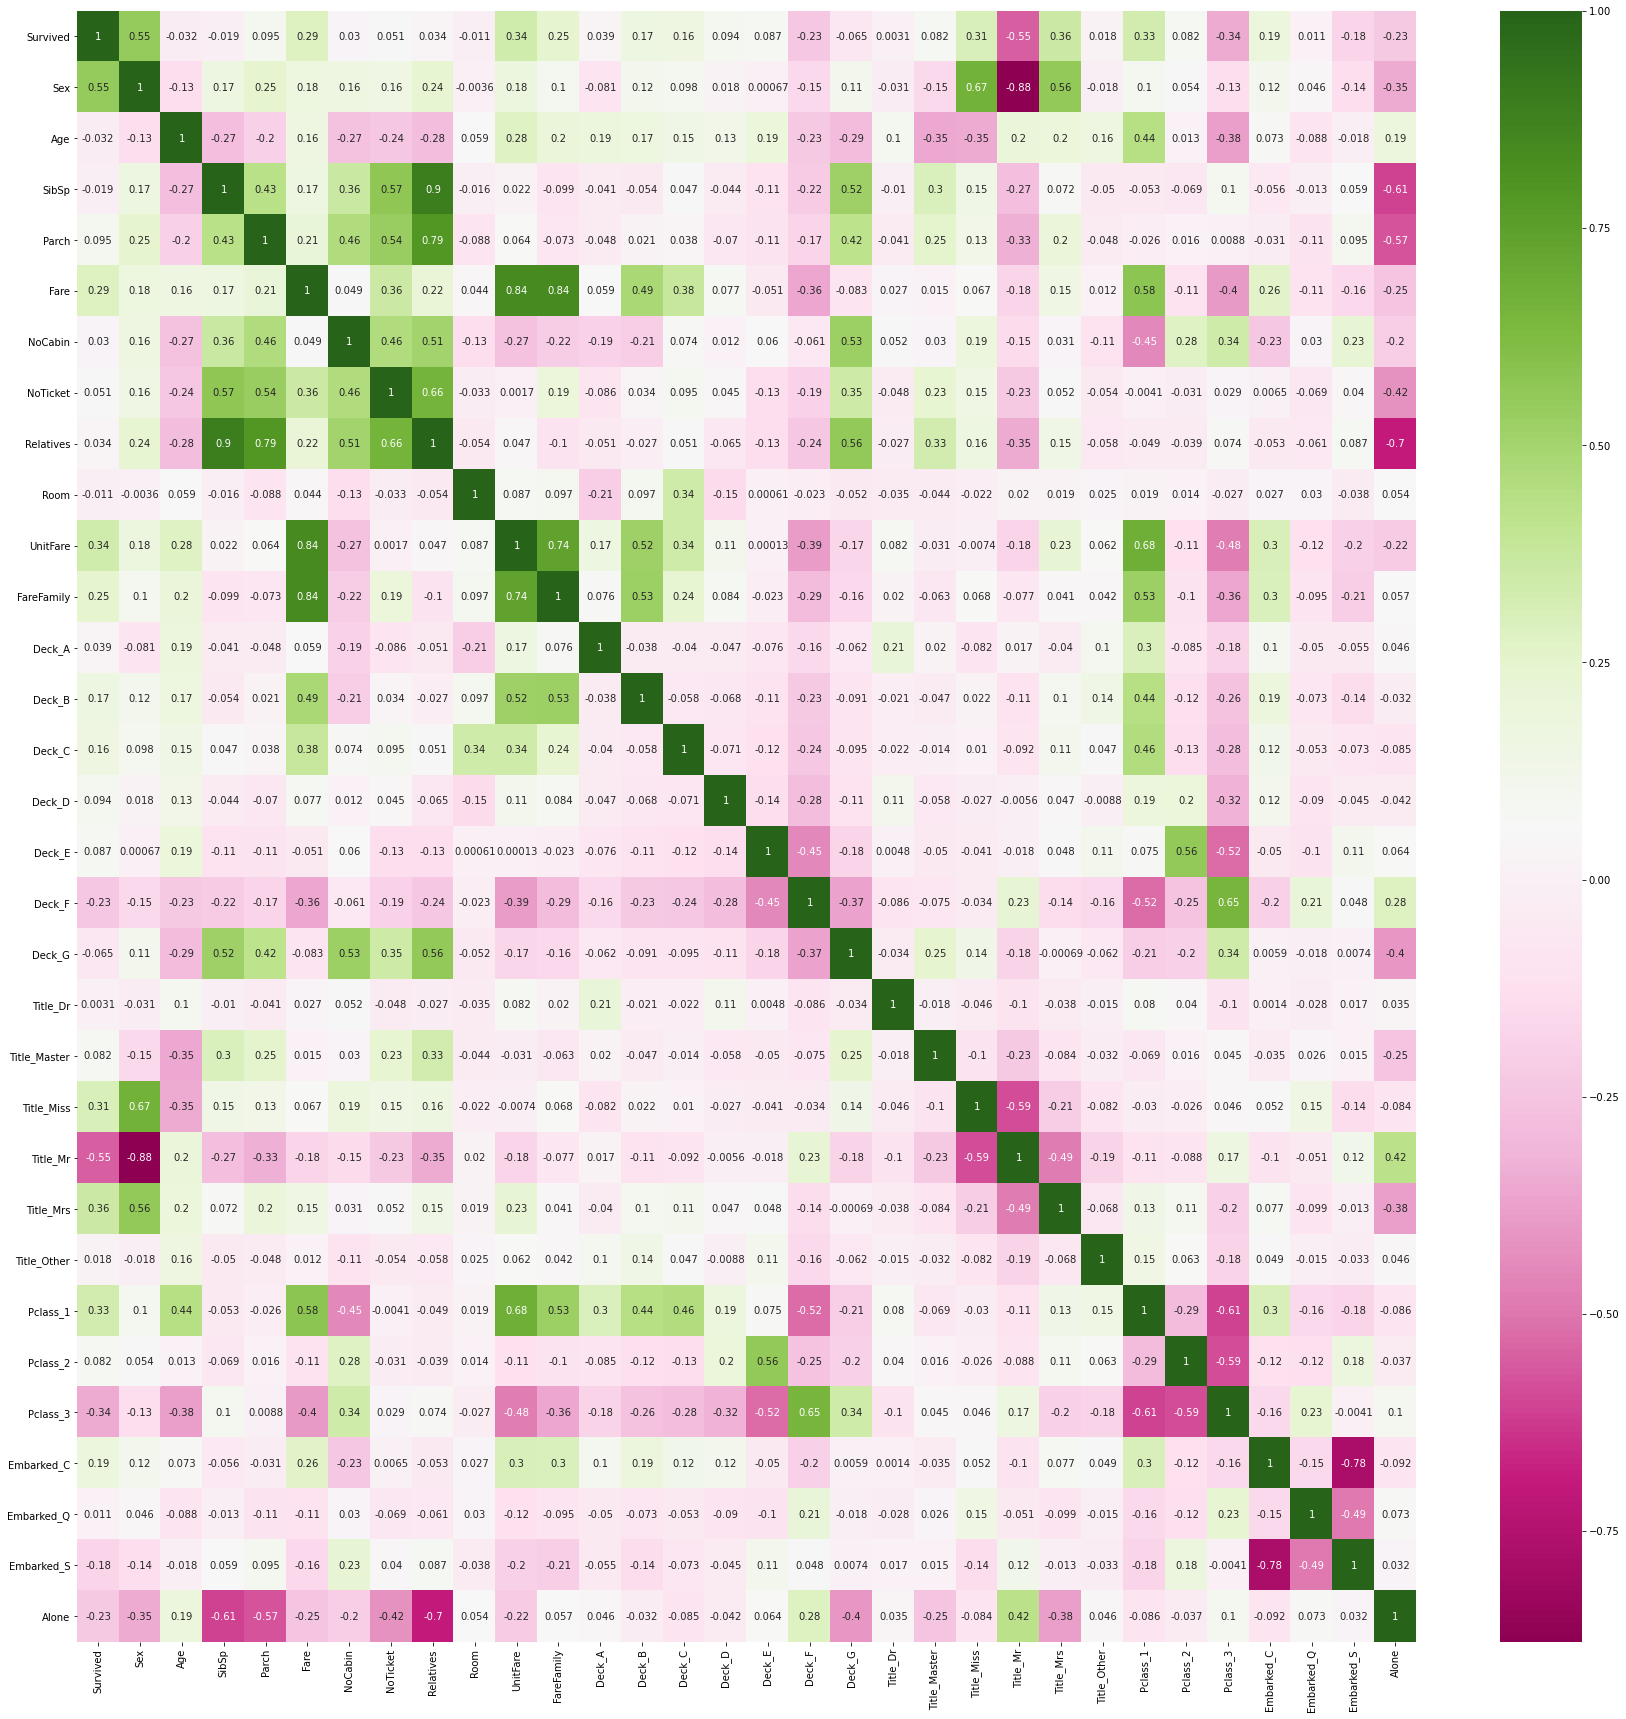

In [329]:
corrMatrix = df_train.corr()
plt.figure(figsize=(30,30))
sn.heatmap(corrMatrix, annot=True, cmap="PiYG")
plt.show()

A túléléssel a legnagyobb korrelációt az osztály

In [483]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [484]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()

In [485]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
df_test.info()